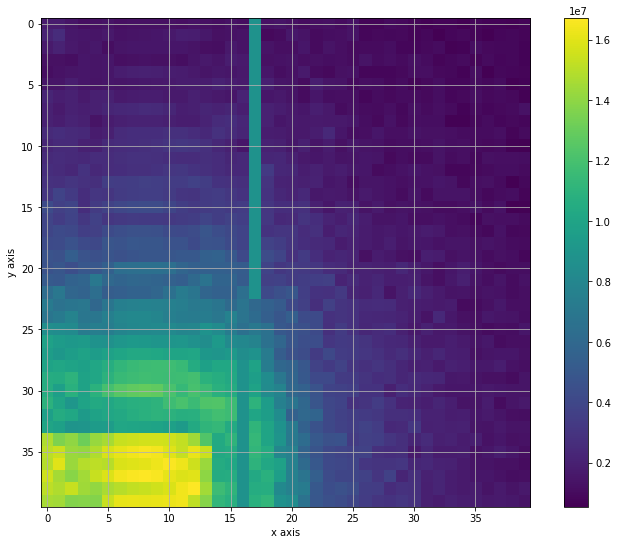

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel, LinearModel
from lmfit import Model, Minimizer, Parameters, report_fit

import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


data = pd.read_pickle('asher_20230603_hyperspec_EL2_98.pkl')

im = data['im']
wavel = data['wavelength']
map = np.sum(im, axis = 2)
# pixel numbers x and y
px = len(im)
py = len(im[0])
intensity = np.zeros((px,py))
#total intensity plot
plt.figure(figsize=(12,9))
plt.grid()
plt.imshow(map, cmap='viridis')
plt.colorbar()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

# Check Full PL

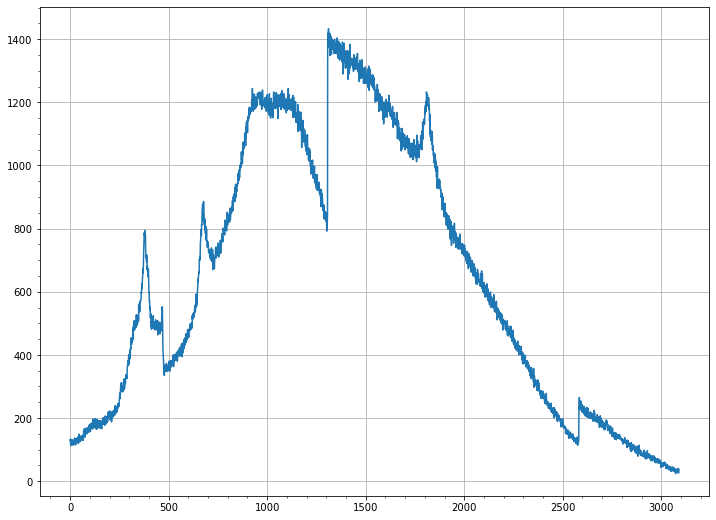

In [55]:
regionx, regiony = 20,27
# regionx, regiony = 0,0
# regionx, regiony = 36,13
# regionx, regiony = 35,16
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['im'][regionx][regiony])

# Check R2 PL

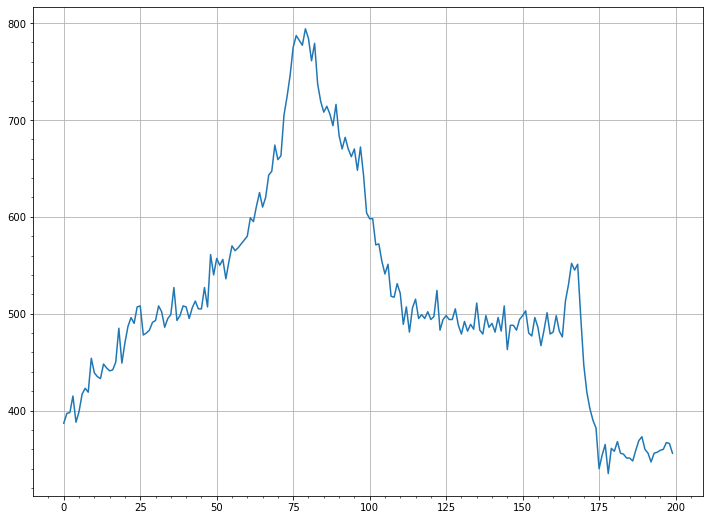

In [56]:
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['im'][regionx][regiony][300:500])

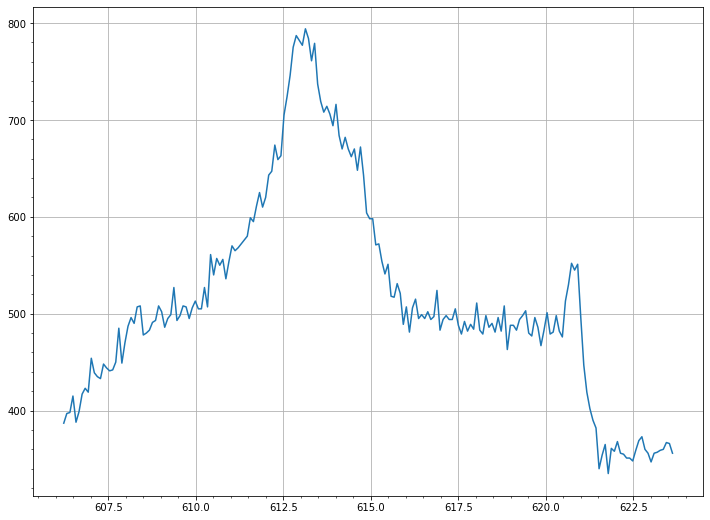

In [57]:
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['wavelength'][300:500],data['im'][regionx][regiony][300:500])

# Fit R2

In [58]:
# line = LinearModel()
# param_guess = line.guess(ramanW, x = ramanIndex)
# line_fit = line.fit(ramanW, param_guess, x = ramanIndex)
# print(line_fit.fit_report())
# print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
# s = line_fit.params['slope'].value
# line_fit.plot()
# plt.title('Graphite $\sin$$\\theta$ v.s. $\sqrt{V}$ for {10} Reflections')
# plt.ylabel(r'$\sin {\theta}$')
# plt.xlabel(r'$\sqrt{V}$')

In [59]:
ramanData = pd.read_csv('secondRaman - EL2-98.csv')
ramanI = np.array(ramanData['I'])
# ramanW = ramanData['W']
# ramanIndex = ramanData['Index']

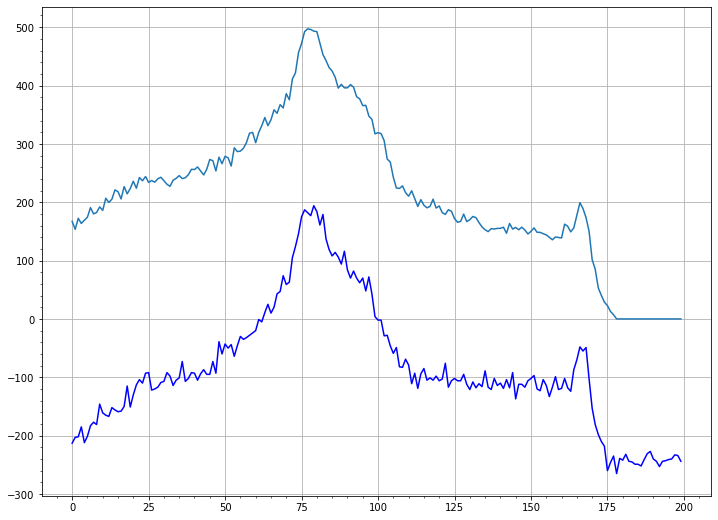

In [60]:
plt.figure(figsize=(12,9))
plt.grid()
plt.minorticks_on()
plt.plot(data['im'][regionx][regiony][300:500]-600, color = 'b')
plt.plot( ramanI[300:500]/1250*500)

In [61]:
# def raman2(w,scale, shift):
#     result = []
#     for element in w:
#         result.append(scale*ramanI[int(0.08580097*(element-shift)+550.475450)])
#     return result

In [62]:
# def raman2(w,scale, shift):
#     return (scale*ramanI[int(0.08580097*(w-shift)+550.475450)])


In [63]:
# x = np.linspace(0, 15, 301)
# np.random.seed(2021)
# data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) +
#         np.random.normal(size=x.size, scale=0.2))
# plt.plot(data)

In [64]:
# currentPL = data['im'][regionx][regiony]
# model2 = QuadraticModel(prefix='bkg_') + Model(raman2)
# model = model2
# params = model.make_params()
# print(f'independent variables: {model.independent_vars}')
# print(f'parameter names: {model.param_names}')

In [65]:
# params['scale'].set(value=1, min = 0, vary=True)
# params['shift'].set(value=0, min = -30, max = 30, vary=True)


# params['bkg_a'].set(value = 0, vary=True)
# params['bkg_b'].set(value = 0, min = 0, vary=True)
# params['bkg_c'].set(value = 0, vary=True)


In [66]:
# Index = list(range(300,500))

# weightList = 1/np.sqrt(currentPL[Index])

# result = model.fit(currentPL[Index], params, x=wavel[Index], weights=weightList)
# print(result.fit_report(show_correl=False))
# myfig=plt.figure(figsize=(15,15))
# result.plot(fig=myfig)

In [67]:
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    scale = params['scale']
    a = params['a']
    b = params['b']
    c = params['c']
    model = a*x**2+b*x+c
    return model + scale * ramanI[300:500] - data

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 4
    chi-square         = 39127.3580
    reduced chi-square = 199.629378
    Akaike info crit   = 1063.25197
    Bayesian info crit = 1076.44524
[[Variables]]
    scale:  0.41001441 +/- 0.00670086 (1.63%) (init = 1)
    a:      0.05429485 +/- 0.07298631 (134.43%) (init = 0)
    b:     -58.6841043 +/- 89.5678726 (152.63%) (init = 0)
    c:      15848.5525 +/- 27474.4823 (173.36%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)     = -1.000
    C(b, c)     = -1.000
    C(a, c)     = 1.000
    C(scale, a) = 0.799
    C(scale, b) = -0.798
    C(scale, c) = 0.797


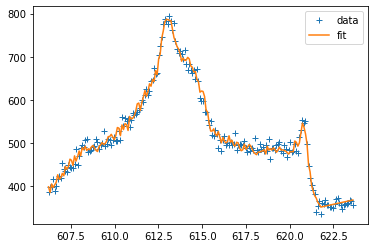

In [68]:
Index = list(range(300,500))
currentPL = data['im'][regionx][regiony]
# create a set of Parameters
params = Parameters()
params.add('scale', value=1, min=0)
params.add('a', value=0)
params.add('b', value=0.0)
params.add('c', value=0)

# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(wavel[Index], currentPL[Index]))
result = minner.minimize()

# calculate final result
# final = data + result.residual

# write error report
# report_fit(result)
# myfig=plt.figure(figsize=(15,15))
# plt.plot(wavel[Index], currentPL[Index], '+', markersize = 20)
# plt.plot(wavel[Index], currentPL[Index] + result.residual)
# plt.show()

report_fit(result)
plt.plot(wavel[Index], currentPL[Index], '+', label = 'data')
plt.plot(wavel[Index], currentPL[Index] + result.residual, label = 'fit')
plt.legend()
plt.show()


In [69]:
print(result.params['a'])

<Parameter 'a', value=0.054294846120522884 +/- 0.073, bounds=[-inf:inf]>


In [70]:
result.params['scale'].value

0.41001440924912047